# W14 - Heart Disease Analysis

Jefferson Mourent / 0706022110008

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 1. Data Preparation / Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
duplicates = df.duplicated().sum()
print("Duplicates:", duplicates)

Duplicates: 1


In [5]:
# Ada satu data duplicate, di delete baris tersebut

df = df.drop_duplicates()

duplicates = df.duplicated().sum()
print("Duplicates:", duplicates)

Duplicates: 0


#### 2. EDA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


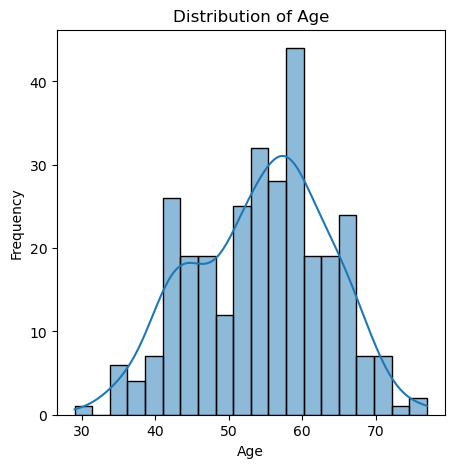

In [7]:
# Persebaran data Kolom Age

plt.figure(figsize=(5, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

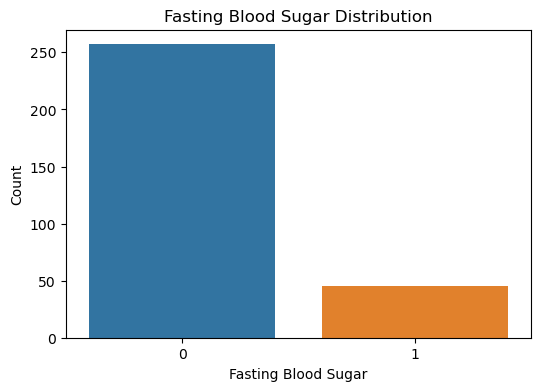

In [8]:
# Persebaran data Kolom fbs
plt.figure(figsize=(6, 4))
sns.countplot(x='fbs', data=df)
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.show()

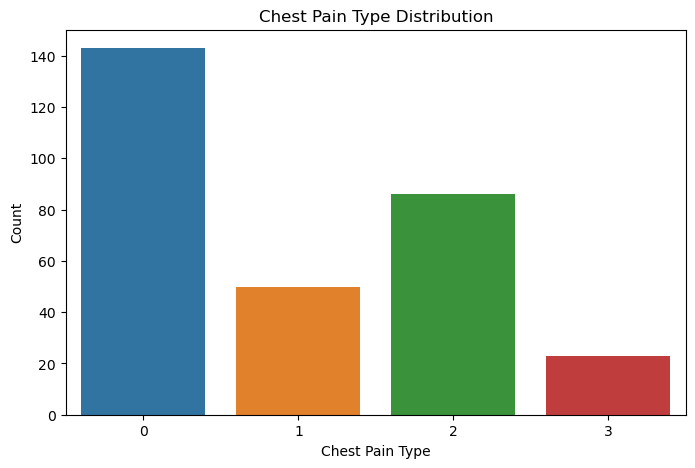

In [9]:
# Persebaran data Kolom cp
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', data=df)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

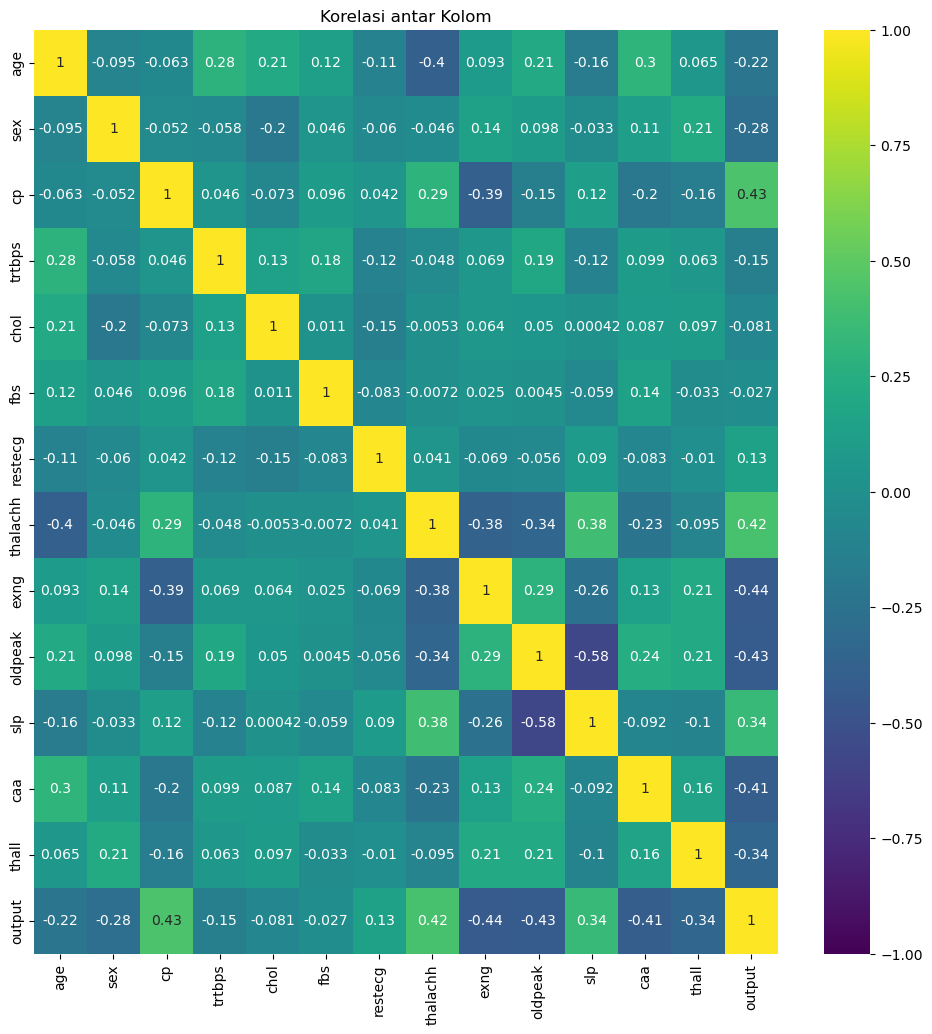

In [10]:
plt.figure(figsize = (12,12))
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True)
plt.title('Korelasi antar Kolom')
plt.show()

#### 3. Compare 2 Variable

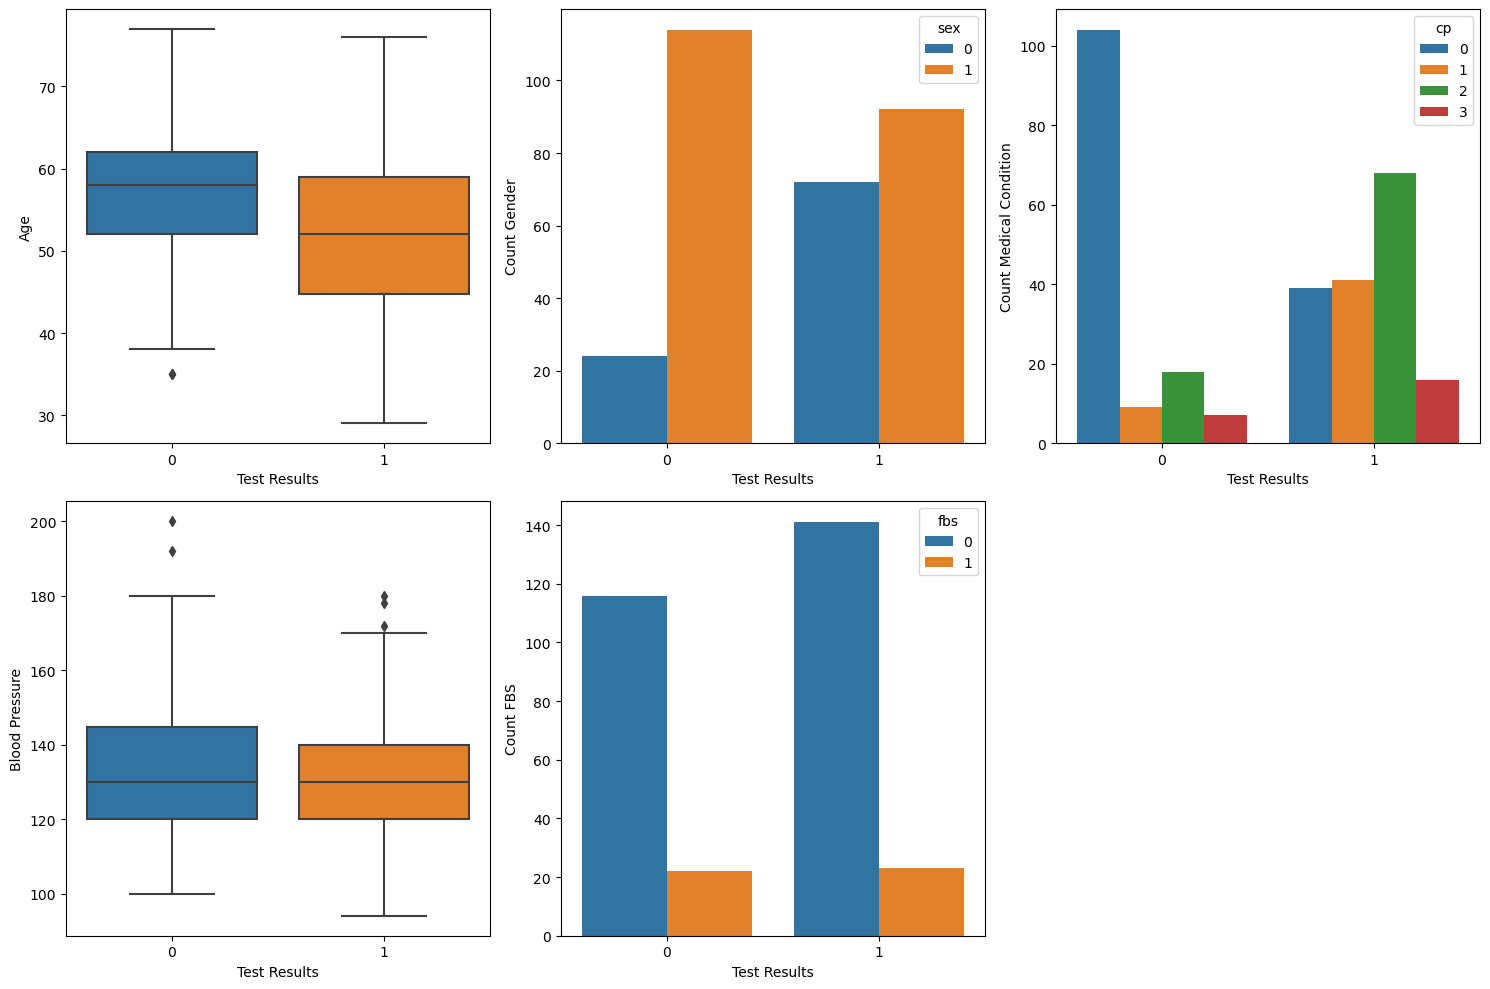

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Boxplot for Age vs. Test Results
sns.boxplot(x='output', y='age', data=df, ax=axes[0, 0])
axes[0, 0].set_xlabel("Test Results")
axes[0, 0].set_ylabel("Age")

# Count plot for Gender vs. Test Results
sns.countplot(x='output', hue='sex', data=df, ax=axes[0, 1])
axes[0, 1].set_xlabel("Test Results")
axes[0, 1].set_ylabel("Count Gender")

# Count plot for Medical Condition vs. Test Results
sns.countplot(x='output', hue='cp', data=df, ax=axes[0, 2])
axes[0, 2].set_xlabel("Test Results")
axes[0, 2].set_ylabel("Count Medical Condition")

# Boxplot for Billing Amount vs. Test Results
sns.boxplot(x='output', y='trtbps', data=df, ax=axes[1, 0])
axes[1, 0].set_xlabel("Test Results")
axes[1, 0].set_ylabel("Blood Pressure")

# Count plot for Blood Type vs. Test Results
sns.countplot(x='output', hue='fbs', data=df, ax=axes[1, 1])
axes[1, 1].set_xlabel("Test Results")
axes[1, 1].set_ylabel("Count FBS")

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

Short Analysis:

1. Tabel pertama merupakan tabel antara kolom output dan age, dari data tersebut terlihat bahwa kebanyakan orang yang mempunyai range usia lebih muda atau dibawah 60 tahun memiliki potensi lebih besar untuk mendapat serangan jantung dan sebaliknya

2. Tabel kedua merupakan tabel antara hasil output dengan gender, dari data dapat dilihat bahwa gender tidak terlalu berpengaruh terhadap resiko serangan jantung.

3. Tabel ketiga merupakan tabel antara output dengan medical condition, dari data dapat dilihat bahwa orang yang mempunyai medical condition typical angina cenderung tidak mempunyai resiko serangan jantung namun yang memiliki medical condition yang non-anginal pain cenderung memiliki potensi serangan jantung

4. Tabel keempat merupakan tabel antara output dan blood presence, dapat dilihat bahwa tidak berpengaruh besar akan hasil output

5. Tabel kelima merupakan tabel antara output dan fbs, dari data dapat dilihat bahwa fbs juga tidak berpengaruh besar akan hasil dari output karena persebaran nya merata.

#### 4. Classification

In [12]:
X = df.drop(["output"], axis=1)
y = df['output']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

- Logistic Regression

In [14]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\Jefferson\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [15]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0]


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[16  1]
 [ 2 12]]
Accuracy Score :  0.9032258064516129


- Random Forest

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = rf_model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0]


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[17  0]
 [ 4 10]]
Accuracy Score :  0.8709677419354839


- Naive Baiyes

In [20]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred = naive_bayes.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0]


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[17  0]
 [ 2 12]]
Accuracy Score :  0.9354838709677419


Conclussion :

Akurasi skor yang paling tinggi adalah model dengan menggunakan metode Gaussian Naive Baiyes dengan 0.9354838709677419 dan yang paling rendah adalah dengan metode Random Forest dengan akurasi skor sebesar 0.8709677419354839. Perbedaan akurasi antara Gaussian Naive Bayes dan Random Forest dapat disebabkan oleh asumsi independensi fitur pada Naive Bayes dalam kasus ini mungkin disebabkan oleh karakteristik khusus dari dataset tersebut yang mendukung asumsi independensi fitur, sementara Random Forest lebih fleksibel menangani kompleksitas dan variasi dalam dataset, serta tidak tergantung pada asumsi distribusi data.